# EN.605. 646 01 : Natural Language Processing 
# Lab 3 (Tim Chen)
## (a) Study the training data
### load the training data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./assets/train.tsv', sep='\t', header=None, names=['rating', 'docid', 'review'])
print(data.head())

   rating                   docid  \
0       4   z8DDztUxuIoHYHddDL9zQ   
1       2  BIeDBg4MrEd1NwWRlFHLQQ   
2       4  NJHPiW30SKhItD5E2jqpHw   
3       2  nnS89FMpIHz7NPjkvYHmug   
4       2   FYxSugh9PGrX1PR0BHBIw   

                                              review  
0  So let me set the scene first, My church socia...  
1  Decent but terribly inconsistent food. I've ha...  
2  Looks aren't everything.......  This little di...  
3  Being a creature of habit anytime I want good ...  
4  I recently told a friend that I cant figure ou...  


### 10 example features of the training data

In [13]:
word_map = {}
for i, review in enumerate(data['review']):
    for word in review.split():
        if word not in word_map:
            word_map[word] = [data['rating'][i]]
        else:
            word_map[word].append(data['rating'][i])

# calculate the positive rate for each word
for word in word_map:
    word_map[word] = [np.mean([1 if rating > 3 else 0 for rating in word_map[word]]), len(word_map[word])]

# sort the words by their positive rate
word_map = sorted(word_map.items(), key=lambda x: x[1], reverse=True)

# print the top 10 words (positive) with the most occurrences
print('Top 10 positive words with the most occurrences:')
for i in range(10):
    print(word_map[i])
print()

# print the top 10 words (negative) with the most occurrences
print('Top 10 negative words with the most occurrences:')
offset = 0
while word_map[offset][1][0] > 0:
    offset += 1
for i in range(10):
    print(word_map[offset + i])



Top 10 positive words with the most occurrences:
('comfort', [1.0, 14])
('Cuban', [1.0, 11])
('Fat', [1.0, 10])
('Phoenix.', [1.0, 10])
('pork,', [1.0, 9])
('Salsa', [1.0, 9])
('Robin', [1.0, 8])
('ample', [1.0, 8])
("they'll", [1.0, 8])
('$6', [1.0, 8])

Top 10 negative words with the most occurrences:
('overpriced', [0.0, 22])
('disappointing.', [0.0, 19])
('terrible.', [0.0, 13])
('meh.', [0.0, 11])
('suppose', [0.0, 11])
('stale', [0.0, 10])
('gross.', [0.0, 10])
('overpriced.', [0.0, 10])
('mediocre.', [0.0, 10])
('lasagna', [0.0, 10])


### Observation

The below plot shows two horizontal lines for the two classes. This indicate that there are certain word that are mostly occur in one class but not the other. For example, the word "comfort" only appears in the positive class. On the other hand, the word "meh." only appears in the negative class.

Also, we observe the majority of the words are not very informative. The peak of the distribution is around 0.5 for positivity, which means that most of the words are neutral. We could avoid these words by setting thresholds for the positivity rate of the word.

Text(0.5, 1.0, 'Positive rate vs Occurance')

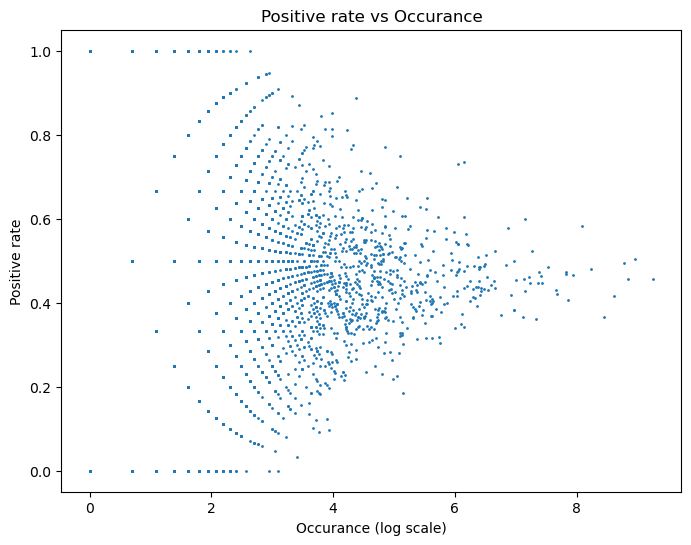

In [72]:
# plot the positive rate occurance scatter plot (occurance in log scale)
plt.figure(figsize=(8, 6))
plt.scatter([np.log(word[1][1]) for word in word_map], [word[1][0] for word in word_map], s=1)
plt.xlabel('Occurance (log scale)')
plt.ylabel('Positive rate')
plt.title('Positive rate vs Occurance')

## (b) Train a classifier

### Approach Description
1. AlgorithmLinear: SVM
2. Important Parameters: Use grid search to find the best parameters
3. Feature Type: Bag of Words (unigrams)
4. Total Number of Features: len(vectorizer.get_feature_names())

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Split data
train_data = data
dev_data = pd.read_csv('./assets/dev.tsv', sep='\t', header=None, names=['rating', 'docid', 'review'])

# Create a BoW representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['review'])
y_train = train_data['rating']

# Create the SVM classifier
clf_svm = SVC()

# Define the hyperparameter grid for GridSearchCV
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create GridSearchCV object
grid_search_svm = GridSearchCV(estimator=clf_svm, param_grid=param_grid_svm, cv=3, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_svm.best_params_)

# Get the best classifier
best_clf_svm = grid_search_svm.best_estimator_


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


### Feature Representation

In [77]:
X_dev = vectorizer.transform(dev_data['review'])

# Feature representation for the first document in the dev set
print({vectorizer.get_feature_names_out()[index]: value for index, value in enumerate(X_dev[0].toarray()[0]) if value > 0})

{'again': 1, 'and': 6, 'average': 1, 'both': 1, 'business': 1, 'chef': 1, 'chicken': 1, 'china': 2, 'deserves': 1, 'does': 1, 'enjoyed': 1, 'fan': 1, 'first': 1, 'food': 1, 'forward': 1, 'friendly': 1, 'general': 1, 'good': 2, 'grand': 1, 'great': 1, 'have': 2, 'if': 1, 'in': 1, 'is': 2, 'it': 2, 'items': 1, 'just': 1, 'lady': 1, 'look': 1, 'management': 1, 'menu': 3, 'new': 1, 'not': 3, 'of': 1, 'on': 2, 'once': 1, 'online': 1, 'opened': 1, 'original': 2, 'other': 1, 'pepper': 1, 'phone': 1, 'place': 1, 'portion': 1, 'price': 1, 'really': 1, 'recent': 1, 'restaurant': 1, 'return': 1, 'she': 1, 'site': 1, 'size': 1, 'so': 1, 'steak': 1, 'tasty': 1, 'the': 6, 'their': 2, 'this': 1, 'to': 2, 'told': 1, 'trying': 1, 'tso': 1, 'under': 1, 'wanted': 1, 'web': 1, 'were': 2, 'what': 1, 'when': 1, 'years': 1, 'yet': 1, 'you': 1, 'your': 1}


### Predictions

In [76]:
predictions_svm = best_clf_svm.predict(X_dev)

# Predictions for the first 10 documents in the dev set
for i in range(10):
    print(f'Prediction: {predictions_svm[i]}, Actual: {dev_data["rating"][i]}')


Prediction: 4, Actual: 4
Prediction: 4, Actual: 4
Prediction: 2, Actual: 2
Prediction: 4, Actual: 4
Prediction: 4, Actual: 4
Prediction: 2, Actual: 2
Prediction: 2, Actual: 2
Prediction: 2, Actual: 4
Prediction: 2, Actual: 2
Prediction: 2, Actual: 2


## (c) Evaluate your predictions

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
precision_svm = precision_score(dev_data['rating'], predictions_svm, pos_label=4)
recall_svm = recall_score(dev_data['rating'], predictions_svm, pos_label=4)
f1_svm = f1_score(dev_data['rating'], predictions_svm, pos_label=4)

# Print metrics with 2 decimal places
print("Precision:", round(precision_svm, 2))
print("Recall:", round(recall_svm, 2))
print("F1 Score:", round(f1_svm, 2))


Precision: 0.82
Recall: 0.81
F1 Score: 0.82


### Mistakes Output

The first review was really cool that it includes a lot of "but" given the positive sentiment. 

The second review was just contains a lot of complaints. At first glance, I would say it's a negative review too 🤣.

In [128]:
incorrect_predictions_svm = dev_data[dev_data['rating'] != predictions_svm]

# print full review for the first 5 incorrect predictions
for i in range(2):
    print("True rating:", "Positive" if incorrect_predictions_svm['rating'].iloc[i] > 3 else "Negative")
    print(incorrect_predictions_svm['review'].iloc[i])
    print()


True rating: Positive
Our Las Vegas friend suggested duck tacos after hanging out and having some drinks for a late night/ early morning (around 4am) snack.  All we needed to hear was tacos and we were in.  The small bar area of this place is open 24/7 so we stopped in for some half priced tapas (happy hour from midnight to 8am) and to chat with Dave, our friend's friend and an incredibly cool guy that was working the overnight shift.  It was 4am and I didn't want to be stuffed before going to bed, so I only ordered a few dishes.  I had the steak skewers with teriyaki glaze and the garlic cheese bread.  Both were good, but the garlic cheese bread was really good in its garlicy and cheesy-ness.  I also had one of the duck tacos from one of the others' plates and it was decent, but if I got it again I'd get it without the creamy tomato cilantro sauce.  Overall, I'd say the food is worth 3 or 3.5 stars, but Dave's coolness bumps this location up to a solid 4 stars.

True rating: Positive


## (d) Build a second classifier with XGBoost

In [82]:
import xgboost as xgb


# Create the XGBoost classifier
clf_xgb = xgb.XGBClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=clf_xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search_xgb.fit(X_train, y_train.apply(lambda x: 1 if x > 3 else 0))

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_xgb.best_params_)

# Get the best classifier
best_clf_xgb = grid_search_xgb.best_estimator_


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


### Predictions

In [83]:
# Make predictions for the dev data using the best classifier
predictions_xgb = best_clf_xgb.predict(X_dev)

#convert predictions to 2, 4 classes
predictions_xgb = [4 if prediction == 1 else 2 for prediction in predictions_xgb]

# Predictions for the first 10 documents in the dev set
for i in range(10):
    print(f'Prediction: {predictions_xgb[i]}, Actual: {dev_data["rating"][i]}')

Prediction: 4, Actual: 4
Prediction: 4, Actual: 4
Prediction: 4, Actual: 2
Prediction: 4, Actual: 4
Prediction: 4, Actual: 4
Prediction: 2, Actual: 2
Prediction: 2, Actual: 2
Prediction: 4, Actual: 4
Prediction: 2, Actual: 2
Prediction: 2, Actual: 2


### Evaluation with Precision, Recall, and F1

In [84]:
# Calculate metrics
precision_xgb = precision_score(dev_data['rating'], predictions_xgb, pos_label=4)
recall_xgb = recall_score(dev_data['rating'], predictions_xgb, pos_label=4)
f1_xgb = f1_score(dev_data['rating'], predictions_xgb, pos_label=4)

# Print metrics with 2 decimal places
print("Precision:", round(precision_xgb, 2))
print("Recall:", round(recall_xgb, 2))
print("F1 Score:", round(f1_xgb, 2))


Precision: 0.83
Recall: 0.83
F1 Score: 0.83


### Mistakes Output

- The word "fantastic" in the first review is a positive word. However, the "used to" in the review makes the review negative.

In [127]:
incorrect_predictions_xgb = dev_data[dev_data['rating'] != predictions_xgb]

# print full review for the first 5 incorrect predictions
for i in range(1):
    print("True rating:", "Positive" if incorrect_predictions_xgb['rating'].iloc[i] > 3 else "Negative")
    print(incorrect_predictions_xgb['review'].iloc[i])
    print()


True rating: Negative
Olive Garden used to be a favorite of the family, recently they cut back the menu extensively and many of our favorites are gone.  I suggest checking the menu online before coming to see what's left.



### Comparison between SVM and XGBoost results

XGBoost is more accurate than SVM in this case, but only by a small margin. It is likely that there are some marginal cases that XGBoost can handle better than SVM.



## Feature engineering

### Feature Engineering Description
- Add 2-gram features
- Tried sentiwordnet, but it didn't improve the performance
- Tried negation, but it didn't improve the performance


In [119]:
from sklearn.feature_selection import SelectKBest, chi2
from nltk.tokenize import word_tokenize


# Load train and dev data
train_data = pd.read_csv('./assets/train.tsv', sep='\t', header=None, names=['rating', 'docid', 'review'])
dev_data = pd.read_csv('./assets/dev.tsv', sep='\t', header=None, names=['rating', 'docid', 'review'])

# Create a CountVectorizer with bigram tokenization
vectorizer = CountVectorizer(ngram_range=(1, 2))  # This includes unigrams and bigrams
X_train = vectorizer.fit_transform(train_data['review'])
X_dev = vectorizer.transform(dev_data['review'])
y_train = train_data['rating']

# Apply feature selection using SelectKBest with chi-squared test
k_best = SelectKBest(score_func=chi2, k=10000)  # Adjust the value of k as needed
X_train_selected = k_best.fit_transform(X_train, y_train)
X_dev_selected = k_best.transform(X_dev)

# Create the XGBoost classifier
clf = xgb.XGBClassifier()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='f1')

# Fit the model using GridSearchCV
grid_search.fit(X_train_selected, y_train.apply(lambda x: 1 if x > 3 else 0))

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best classifier
best_clf = grid_search.best_estimator_

# Make predictions for the dev data using the best classifier
predictions = best_clf.predict(X_dev_selected)

#convert predictions to 2, 4 classes
predictions = [4 if prediction == 1 else 2 for prediction in predictions]

# Calculate metrics
precision = precision_score(dev_data['rating'], predictions, pos_label=4)
recall = recall_score(dev_data['rating'], predictions, pos_label=4)
f1 = f1_score(dev_data['rating'], predictions, pos_label=4)

# Print metrics with 2 decimal places
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1 Score:", round(f1, 2))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Precision: 0.83
Recall: 0.84
F1 Score: 0.83


In [125]:
# Load test data
test_data = pd.read_csv('./assets/test.tsv', sep='\t', header=None, names=['docid', 'review']).reset_index()

X_test = vectorizer.transform(test_data['review'])
X_test_selected = k_best.transform(X_test)

# Make predictions for the test data using the best classifier
predictions = best_clf.predict(X_test_selected)

#convert predictions to 2, 4 classes
predictions = [4 if prediction == 1 else 2 for prediction in predictions]

# Write predictions to file
with open('test_result.txt', 'w') as f:
    for i, prediction in enumerate(predictions):
        f.write(f'{test_data["docid"][i]}\t{prediction}\n')